In [1]:
import os

import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm_notebook as tqdm

import pickle
from joblib import load, dump

from pprint import pprint

from minio import Minio
from minio.error import ResponseError, NoSuchKey

from io import StringIO, BytesIO

In [2]:
df = pd.read_csv("features1min.csv", index_col="Unnamed: 0")

In [3]:
df["vehicleid"] = df.index
df["vehicleid"] = df["vehicleid"].apply(lambda f: int(f.split("/")[-1].split("_")[0]))

In [4]:
df["vehicleid"].value_counts()

6039    7701
4024    6337
4026    5077
6067    4622
4005    3313
6015    3029
4018    2589
6052    2467
4616     759
7016     488
0        317
4908     124
4202      62
1311      23
1367      18
Name: vehicleid, dtype: int64

In [5]:
vehicles = df["vehicleid"].unique()

In [6]:
# THRESHOLD = -0.665
model = load("isoforest1min.gz")
clf = model["model"]
THRESHOLD = model["threshold"]

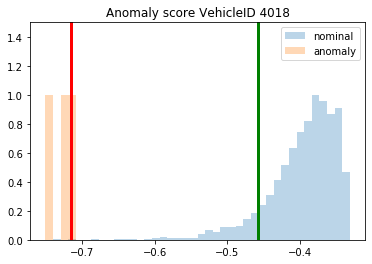

In [7]:
dftmp = df[df["vehicleid"] == 4018].copy()

X = dftmp.drop(["is_nominal", "vehicleid"], axis=1)
y = dftmp["is_nominal"]

#     ypred = clf.decision_function(X)
ypred = clf.score_samples(X)
nominal = ypred[y == 1]
anomaly = ypred[y == 0]

r = (ypred.min(), ypred.max())
a = 0.3
d = False

plt.figure()
plt.title(f"Anomaly score VehicleID 4018")
x1, bins1, p1 = plt.hist(nominal, bins=40, range=r, alpha=a, density=d, label="nominal")
x0, bins0, p0 = plt.hist(anomaly, bins=40, range=r, alpha=a, density=d, label="anomaly")

q10pc = pd.Series(ypred).quantile(0.1)


for item in p1:
    item.set_height(item.get_height()/np.max(x1))
for item in p0:
    item.set_height(item.get_height()/np.max(x0))

plt.ylim(0, 1.5)
plt.axvline(THRESHOLD, color="red", linewidth=3)
plt.axvline(q10pc, color="green", linewidth=3)
plt.legend()
plt.show()

# XX = X.copy()
# XX["score"] = ypred
# data_to_submit = XX[(y==1) & (XX["score"]<q10pc)]
# data_to_submit.sort_values(by=["score"], inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


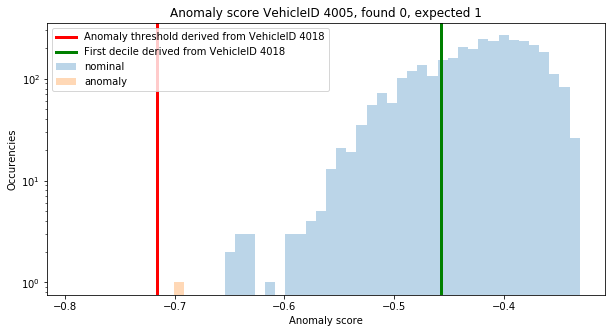

VehicleID 4005
Indices of nominal data below threshold (labeled as anomaly):
[]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


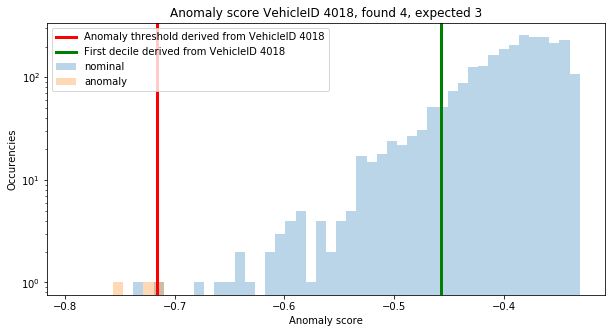

VehicleID 4018
Indices of nominal data below threshold (labeled as anomaly):
['nominal/4018_2020-03-12--03-56-26017000']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


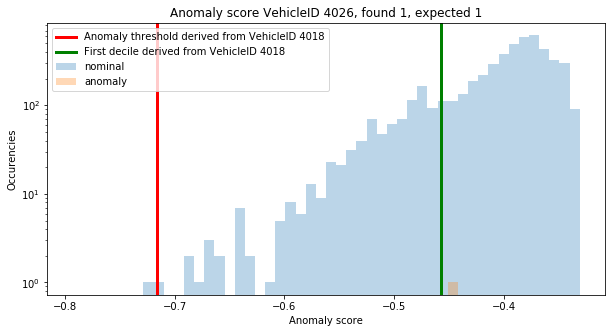

VehicleID 4026
Indices of nominal data below threshold (labeled as anomaly):
['nominal/4026_2020-01-22--07-15-09470000']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


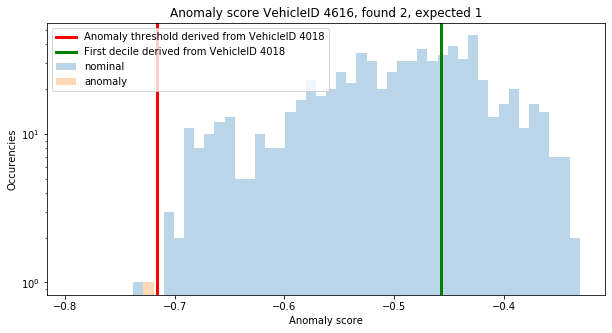

VehicleID 4616
Indices of nominal data below threshold (labeled as anomaly):
['nominal/4616_2020-01-13--05-46-38450000']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


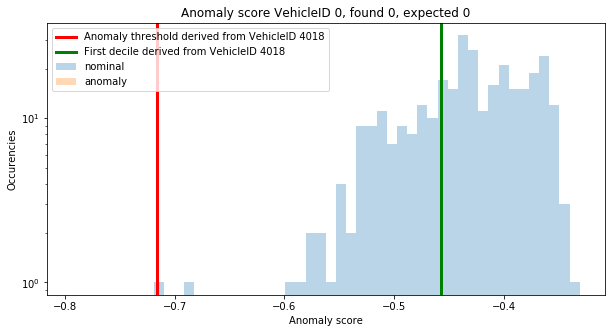

VehicleID 0
Indices of nominal data below threshold (labeled as anomaly):
[]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


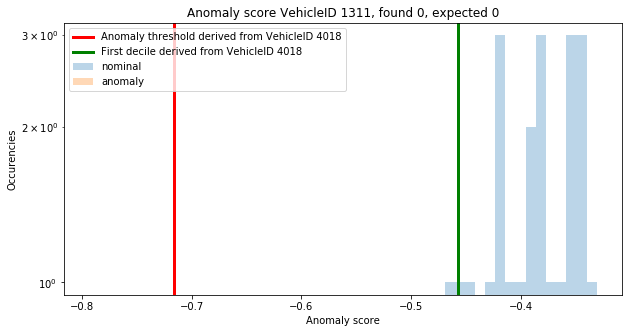

VehicleID 1311
Indices of nominal data below threshold (labeled as anomaly):
[]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


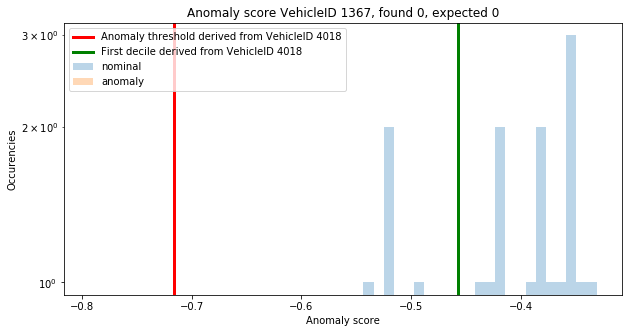

VehicleID 1367
Indices of nominal data below threshold (labeled as anomaly):
[]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


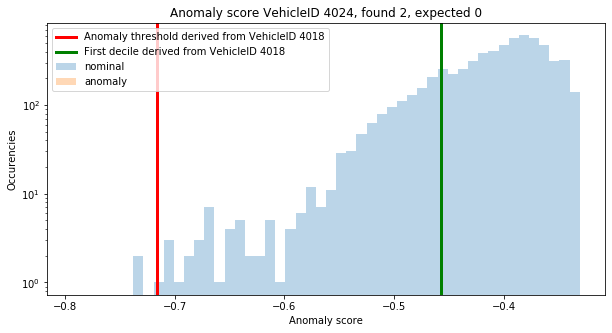

VehicleID 4024
Indices of nominal data below threshold (labeled as anomaly):
['nominal/4024_2020-01-03--06-34-26241000',
 'nominal/4024_2020-02-05--06-52-14137000']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


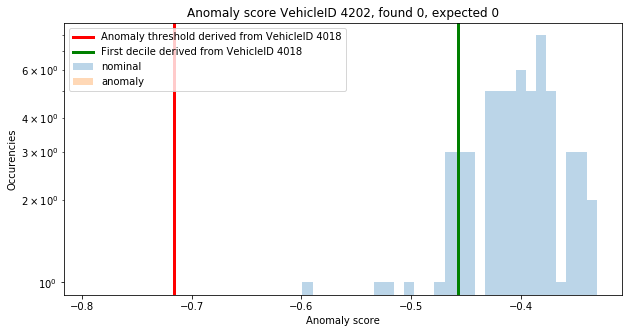

VehicleID 4202
Indices of nominal data below threshold (labeled as anomaly):
[]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


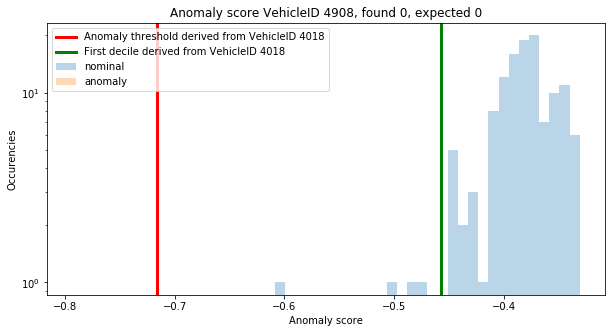

VehicleID 4908
Indices of nominal data below threshold (labeled as anomaly):
[]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


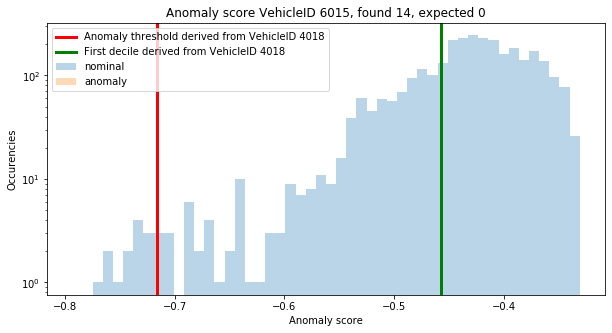

VehicleID 6015
Indices of nominal data below threshold (labeled as anomaly):
['nominal/6015_2020-03-17--06-48-47635000',
 'nominal/6015_2020-03-13--04-44-12758000',
 'nominal/6015_2020-03-17--06-49-47635000',
 'nominal/6015_2020-03-17--07-48-47635000',
 'nominal/6015_2020-03-30--04-39-48855000',
 'nominal/6015_2020-03-13--04-46-12758000',
 'nominal/6015_2020-03-12--02-58-28528000',
 'nominal/6015_2020-03-30--06-16-48855000',
 'nominal/6015_2020-03-26--05-28-34592000',
 'nominal/6015_2020-03-11--04-37-45532000',
 'nominal/6015_2020-03-30--04-52-48855000',
 'nominal/6015_2020-03-13--06-41-12758000',
 'nominal/6015_2020-03-26--05-11-34592000',
 'nominal/6015_2020-03-13--05-16-12758000']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


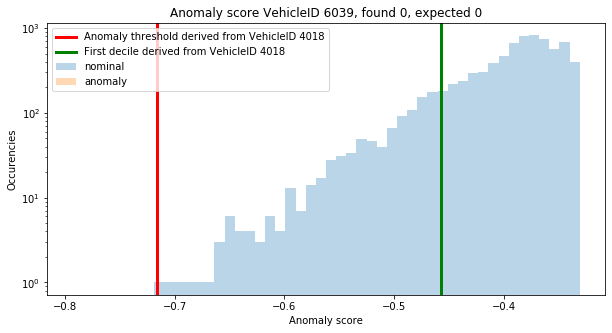

VehicleID 6039
Indices of nominal data below threshold (labeled as anomaly):
[]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


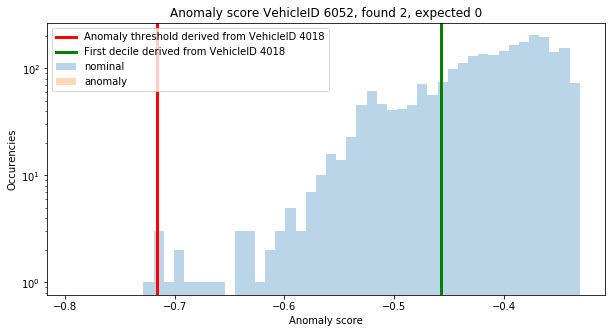

VehicleID 6052
Indices of nominal data below threshold (labeled as anomaly):
['nominal/6052_2020-02-06--05-58-24013000',
 'nominal/6052_2020-02-07--05-40-47406000']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


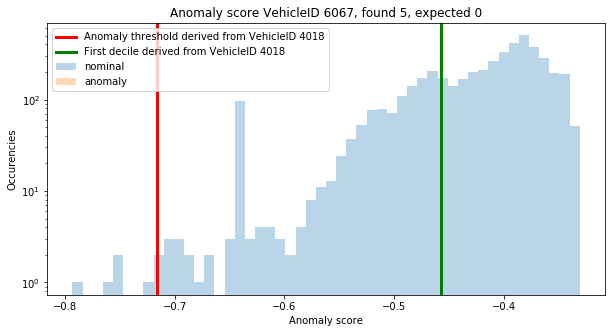

VehicleID 6067
Indices of nominal data below threshold (labeled as anomaly):
['nominal/6067_2020-01-14--08-13-43558000',
 'nominal/6067_2020-01-14--08-14-43558000',
 'nominal/6067_2020-02-06--07-16-08765000',
 'nominal/6067_2020-02-06--07-03-08765000',
 'nominal/6067_2020-01-25--17-54-14066000']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


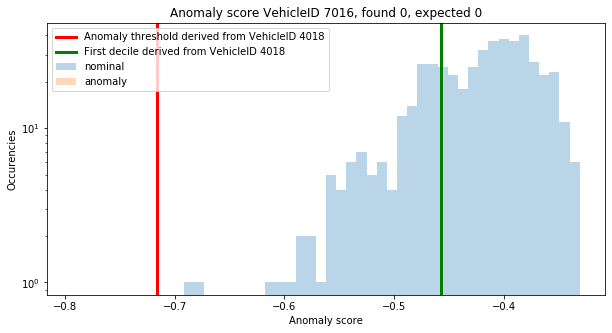

VehicleID 7016
Indices of nominal data below threshold (labeled as anomaly):
[]


In [8]:
Xt = df.drop(["is_nominal", "vehicleid"], axis=1)
# ypredt = clf.decision_function(Xt)
ypredt = clf.score_samples(Xt)

metrics = list()
indices_to_analyze = list()
dfs_to_submit = list()

for vehicleid in vehicles:

    dfv = df[df["vehicleid"] == vehicleid].copy()
    
    X = dfv.drop(["is_nominal", "vehicleid"], axis=1)
    y = dfv["is_nominal"]
    
#     ypred = clf.decision_function(X)
    ypred = clf.score_samples(X)

    X["score"] = ypred
    X.sort_values(by=["score"], inplace=True)
    dfs_to_submit.append(X[(y==1) & (ypred<q10pc)])
    
    anos = X[(y==1) & (ypred<THRESHOLD)].index.tolist()
        
    n_pred_events = sum(ypred < THRESHOLD)
    n_events = len(y[y == 0])
    
    r = (ypredt.min(), ypredt.max())
    a = 0.3
    d = False
    b = 50
    
    nominal = ypred[y == 1]
    anomaly = ypred[y == 0]
        
    tn = sum(nominal >= THRESHOLD)
    tp = sum(anomaly <  THRESHOLD)
    fn = sum(anomaly >= THRESHOLD)
    fp = sum(nominal <  THRESHOLD)
    
    tnr = tn/(tn+fp) if (tn+fp)>0 else 0
    tpr = tp/(tp+fn) if (tp+fn)>0 else 0
    fnr = fn/(fn+tp) if (fn+tp)>0 else 0
    fpr = fp/(fp+tn) if (fp+tn)>0 else 0
    
    if (tp+fp != 0) and (tp+fn != 0):
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = 2*(precision*recall)/(precision+recall)
        accuracy = (tp+tn)/(tp+tn+fp+fn)

        num = tp*tn - fp*fn
        if (tp+fp)>0 or (tp+fn)>0 or (tn+fp)>0 or (tn+fn)>0:
            denom = np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
            mcc = num/denom
        else:
            mcc = num
    else:
        precision, recall, f1, accuracy, mcc = 0, 0, 0, 0, 0

        
    metrics.append({"index":vehicleid,
                    "tn":tn, "tp":tp, "fn":fn, "fp":fp,
                    "tnr":tnr, "tpr":tpr, "fnr":fnr, "fpr":fpr,
                    "precision":precision, "recall":recall, 
                    "f1":f1, "accuracy":accuracy, "mcc":mcc})
#     pprint(metrics[-1])
    
    plt.figure(figsize=(10,5))
    plt.title(f"Anomaly score VehicleID {vehicleid}, found {n_pred_events}, expected {n_events}")
    x1, bins1, p1 = plt.hist(nominal, bins=b, range=r, alpha=a, density=d, label="nominal")
    x0, bins0, p0 = plt.hist(anomaly, bins=b, range=r, alpha=a, density=d, label="anomaly")

#     for item in p1:
#         item.set_height(item.get_height()/np.max(x1))
#     for item in p0:
#         item.set_height(item.get_height()/np.max(x0))

#     plt.ylim(0, 1.5)
    plt.axvline(THRESHOLD, color="red", linewidth=3, label="Anomaly threshold derived from VehicleID 4018")
    plt.axvline(q10pc, color="green", linewidth=3, label="First decile derived from VehicleID 4018")
    plt.legend()
    plt.xlabel("Anomaly score")
    plt.ylabel("Occurencies")
    plt.yscale("log")
    plt.savefig(f"anomaly_score_{vehicleid}.png")
    plt.show()
    plt.close()
    
    print("VehicleID",vehicleid)
    print("Indices of nominal data below threshold (labeled as anomaly):")
    pprint(anos)

    indices_to_analyze += anos
    
data_to_submit = pd.concat(dfs_to_submit)
data_to_submit.to_csv("data_to_submit.csv")

In [9]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,index,tn,tp,fn,fp,tnr,tpr,fnr,fpr,precision,recall,f1,accuracy,mcc
0,4005,3312,0,1,0,1.000000,0.0,1.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000
1,4018,2585,3,0,1,0.999613,1.0,0.0,0.000387,0.75,1.0,0.857143,0.999614,0.865858
2,4026,5075,0,1,1,0.999803,0.0,1.0,0.000197,0.00,0.0,NaN,0.999606,-0.000197
3,4616,757,1,0,1,0.998681,1.0,0.0,0.001319,0.50,1.0,0.666667,0.998682,0.706640
4,0,317,0,0,0,1.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000
5,1311,23,0,0,0,1.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000
6,1367,18,0,0,0,1.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000
7,4024,6335,0,0,2,0.999684,0.0,0.0,0.000316,0.00,0.0,0.000000,0.000000,0.000000
8,4202,62,0,0,0,1.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000
9,4908,124,0,0,0,1.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000
